In [1]:
import os
import sys

#add parent path to system path
par_path = os.path.abspath(os.path.join('..'))
if par_path not in sys.path:
    sys.path.append(par_path)
    
data_path = os.path.join(par_path,'data')

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import numpy.random as rd
import time

# <center> Agent-based model </center>

Here, we shall look at the interaction table of the binary agreement model. Two agents are selected, one with a speaker role and the other with a listener role. The speaker selects an opinion from their portfolio, and shares it to the listener. If they both have that opinion, they both end up having that opinion exclusively. Otherwise, the opinion is added to the portfolio of the listener.


|    Before interaction    | After interaction |
|:------------------------:|:-----------------:|
|  $A \overset{A}{\to} A$  |      $A - A$      |
|  $A \overset{A}{\to} B$  |      $A - AB$     |
|  $A \overset{A}{\to} AB$ |      $A - A$      |
|  $B \overset{B}{\to} A$  |      $B - AB$     |
|  $B \overset{B}{\to} B$  |      $B - B$      |
|  $B \overset{B}{\to} AB$ |      $B - B$      |
|  $AB \overset{A}{\to} A$ |      $A - A$      |
|  $AB \overset{A}{\to} B$ |     $AB - AB$     |
| $AB \overset{A}{\to} AB$ |      $A - A$      |
|  $AB \overset{B}{\to} A$ |     $AB - AB$     |
|  $AB \overset{B}{\to} B$ |      $B - B$      |
| $AB \overset{B}{\to} AB$ |      $B - B$      |

There is a third type of agent - the committed agent. They act like agents with opinion $A$, but do not add opinion $B$ into their portfolio if the speaker shares such an opinion.

In the following code, we shall assume a complete graph.

In [3]:
def exchange(pop, tot):
    """
    Assumes that pop = [B,AB,A,AA] (pop must be numpy array) and tot = sum(pop)
    
    Two integers a drawn from [0,tot-1], representing the speaker and listener.
    The corresponding transformation of the populations are effected.
    """
    
    speaker,listener = rd.randint(tot,size=2)
    
    #get types
    agents = ['B','AB','A','AA']
    subtotal = 0
    for i in range(4):
        if pop[i] > 0:
            subtotal += pop[i]
            if speaker < subtotal:
                speakertype = agents[i]
                break
    subtotal = 0
    for i in range(4):
        if pop[i] > 0:
            subtotal += pop[i]
            if listener < subtotal:
                listenertype = agents[i]
                break
    if speakertype == listenertype:
        return pop

    if speakertype == 'B':
        if listenertype == 'AB':
            return pop + [1,-1,0,0]
        if listenertype == 'A':
            return pop + [0,1,-1,0]
        return pop

    if speakertype == 'AB':
        if listenertype == 'B':
            if rd.randint(2): # AB opinion is A
                return pop + [-1,1,0,0]
            else: # AB opinion is B
                return pop + [1,-1,0,0]
        if listenertype == 'AB':
            if rd.randint(2): #AB opinion is A
                return pop + [0,-2,2,0]
            else: #AB opinion is B
                return pop + [2,-2,0,0]
        if listenertype == 'A':
            if rd.randint(2): #AB opinion is A
                return pop + [0,-1,1,0]
            else: # AB opinion is B
                return pop + [0,1,-1,0]
        if listenertype == 'AA':
            if rd.randint(2): #AB opinion is A
                return pop + [0,-1,1,0]
        return pop
    
    ## all that is left is A or AA
    if listenertype == 'B':
        return pop + [-1,1,0,0]
    if listenertype == 'AB':
        return pop + [0,-1,1,0]
    return pop

Let's test the code with a sample calculation near the critical point

In [14]:
tot = 6_00
p = 0.095
AA = int(p*tot)
pop = np.array([tot - AA,0,0,AA])
Bsum = 0
B_hist = [pop[0]/tot]
Bsum += B_hist[-1]
Bave_hist = [Bsum]

T = 1_000_000
for k in range(T):
    pop=exchange(pop,tot)
    B_hist.append(pop[0]/tot)
    Bsum += B_hist[-1]
    Bave_hist.append(Bsum/(k+2))

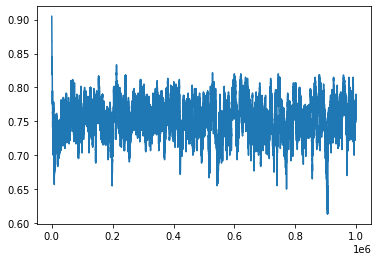

Average value of n_B is 0.7528695587971694


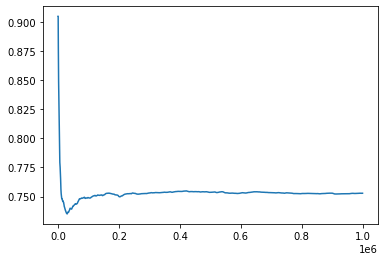

In [15]:
plt.plot(B_hist)
plt.show()
plt.plot(Bave_hist)
print(f'Average value of n_B is {sum(B_hist)/len(B_hist)}')

In [22]:
tot = 6_00
p = 0.100
AA = int(p*tot)
pop = np.array([tot - AA,0,0,AA])
Bsum = 0
B_hist = [pop[0]/tot]
Bsum += B_hist[-1]
Bave_hist = [Bsum]

T = 10_000_000
for k in range(T):
    pop=exchange(pop,tot)
    B_hist.append(pop[0]/tot)
    Bsum += B_hist[-1]
    Bave_hist.append(Bsum/(k+2))

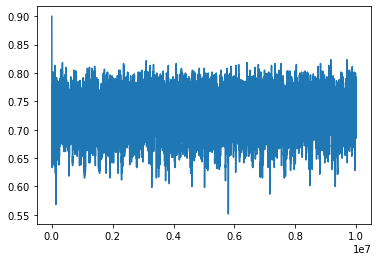

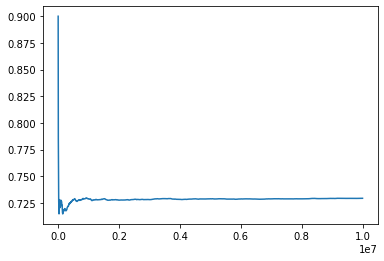

In [23]:
plt.plot(B_hist)
plt.show()
plt.plot(Bave_hist)

# <center> Calculating the stable fixed point </center>

In [ ]:
p = 0.08
r = (1 + p/2)/(np.sqrt(2-p/2)**3)
t2 = 8/(9*np.sqrt(3)) + r/6 + np.sqrt(17/81 - 8*r/(9*np.sqrt(3)) - r**2/12)
print(t2**2 * (4-p)/2)

In [ ]:
r

In [ ]:
2/(3*np.sqrt(3))

In [ ]:
17/81 - 8*r/(9*np.sqrt(3)) - r**2/12

In [ ]:
1/(2*np.sqrt(2))